In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, LeakyReLU, Add, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model

In [2]:
def savefig(title):
    dir = '../figures/NEH_UT_octd/'+title+'.png'
    plt.savefig(dir)

In [3]:
df = pd.read_csv('../dataset/NEH_UT_2021RetinalOCTDataset/data_information.csv')
df.head()

Patient ID Class Eye  B-scan   Label             Directory
0           1   CNV  OS       0  DRUSEN  CNV/1/000_Drusen.jpg
1           1   CNV  OS       1  DRUSEN  CNV/1/001_Drusen.jpg
2           1   CNV  OS       2  DRUSEN  CNV/1/002_Drusen.jpg
3           1   CNV  OS       3  NORMAL  CNV/1/003_Normal.jpg
4           1   CNV  OS       4  NORMAL  CNV/1/004_Normal.jpg

In [5]:
image = df['Directory']
image[90:100]

90    CNV/10/OS/028_Normal.tif
91    CNV/10/OS/029_Normal.tif
92    CNV/10/OS/030_Normal.tif
93      CNV/100/000_Normal.tif
94      CNV/100/001_Normal.tif
95      CNV/100/002_Normal.tif
96      CNV/100/003_Normal.tif
97      CNV/100/004_Normal.tif
98      CNV/100/005_Normal.tif
99      CNV/100/006_Normal.tif
Name: Directory, dtype: object

In [5]:
image_dir = ['../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/' + items for items in image]
image_dir[:10]

['../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/000_Drusen.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/001_Drusen.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/002_Drusen.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/003_Normal.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/004_Normal.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/005_Drusen.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/006_Normal.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/007_Normal.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/008_Drusen.jpg',
 '../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/CNV/1/009_Drusen.jpg']

In [6]:
dataset = pd.DataFrame({'Path':image_dir})
dataset['Label']=df['Label']
dataset.head()

Path   Label
0  ../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT...  DRUSEN
1  ../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT...  DRUSEN
2  ../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT...  DRUSEN
3  ../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT...  NORMAL
4  ../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT...  NORMAL

In [7]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(dataset, stratify=dataset['Label'], test_size=0.07, random_state=42)

In [8]:
train_df, val_df = train_test_split(train_val_df, stratify=train_val_df['Label'], test_size=0.07, random_state=42)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14548 entries, 4226 to 8912
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    14548 non-null  object
 1   Label   14548 non-null  object
dtypes: object(2)
memory usage: 341.0+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1178 entries, 13214 to 5768
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    1178 non-null   object
 1   Label   1178 non-null   object
dtypes: object(2)
memory usage: 27.6+ KB


In [11]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 11604 to 3653
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    1096 non-null   object
 1   Label   1096 non-null   object
dtypes: object(2)
memory usage: 25.7+ KB


(array([0, 1, 2]),
 [Text(0, 0, 'NORMAL'), Text(1, 0, 'DRUSEN'), Text(2, 0, 'CNV')])

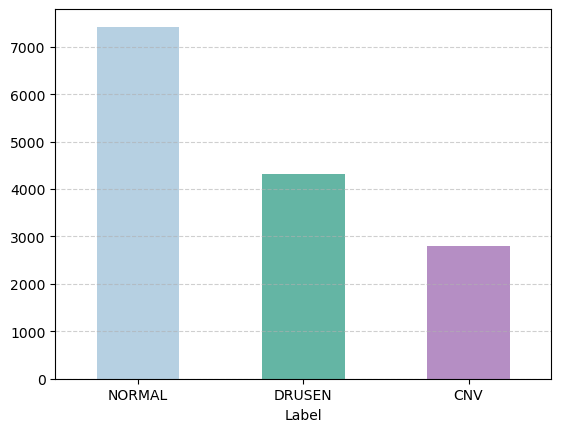

In [12]:
train_df['Label'].value_counts().plot(kind='bar',color = ['#B6D0E2','#64b5a4','#b58ec4'])
plt.grid(linestyle='--', alpha=0.6, axis='y')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'NORMAL'), Text(1, 0, 'DRUSEN'), Text(2, 0, 'CNV')])

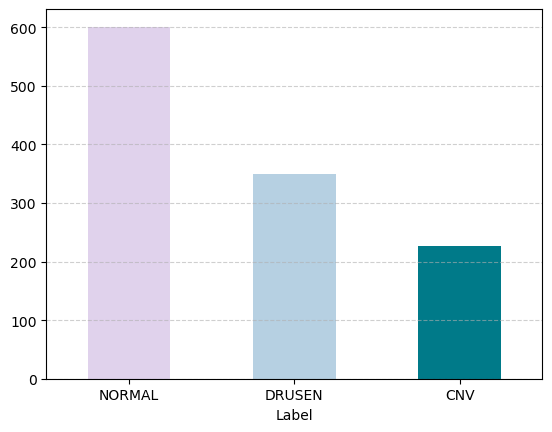

In [13]:
test_df['Label'].value_counts().plot(kind='bar',color = ['#e0d2ec','#B6D0E2','#007a89'])
plt.grid(linestyle='--', alpha=0.6, axis='y')
plt.xticks(rotation=0)

<Axes: xlabel='Label'>

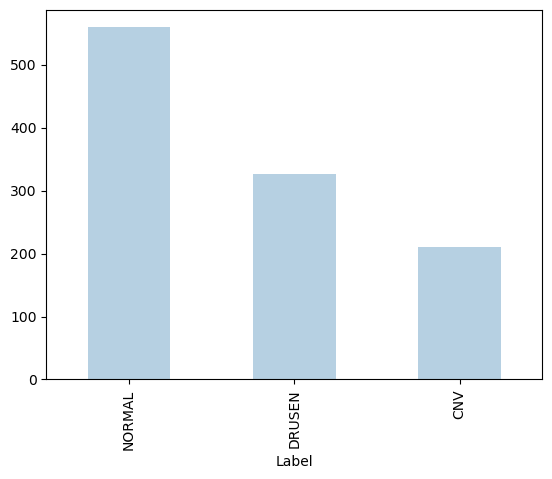

In [14]:
val_df['Label'].value_counts().plot(kind='bar',color = '#B6D0E2')

In [15]:
def crop_from_bottom(image):
    
    crop_height = tf.shape(image)[0] - 20  
    original_width = tf.shape(image)[1]

    
    cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, crop_height, original_width)
    target_size = (224, 224)
    resized_image = tf.image.resize(cropped_image, target_size)

    return resized_image



In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    preprocessing_function=crop_from_bottom
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=crop_from_bottom
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=crop_from_bottom
)

In [17]:
img_size = (224,224)
batch_size = 32

train_data = train_datagen.flow_from_dataframe(dataframe=train_df, x_col='Path', y_col='Label',
                                               target_size= img_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True
                                              )
val_data = val_datagen.flow_from_dataframe(dataframe=val_df, x_col='Path',y_col='Label',
                                           target_size=img_size,
                                           batch_size=batch_size,
                                           class_mode='categorical'
                                          )
test_data = test_datagen.flow_from_dataframe(dataframe=test_df,x_col='Path',y_col='Label',
                                             target_size=img_size,
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                            )

Found 14548 validated image filenames belonging to 3 classes.
Found 1096 validated image filenames belonging to 3 classes.
Found 1178 validated image filenames belonging to 3 classes.


# Viewing some Images

In [18]:
def view_images(images,labels):
    plt.figure(figsize=(16,8))
    for i in range(8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        plt.title(Labels[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [19]:
import os
Labels = os.listdir('../dataset/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/')
Labels

['CNV', 'DRUSEN', 'NORMAL']

# Viewing train images

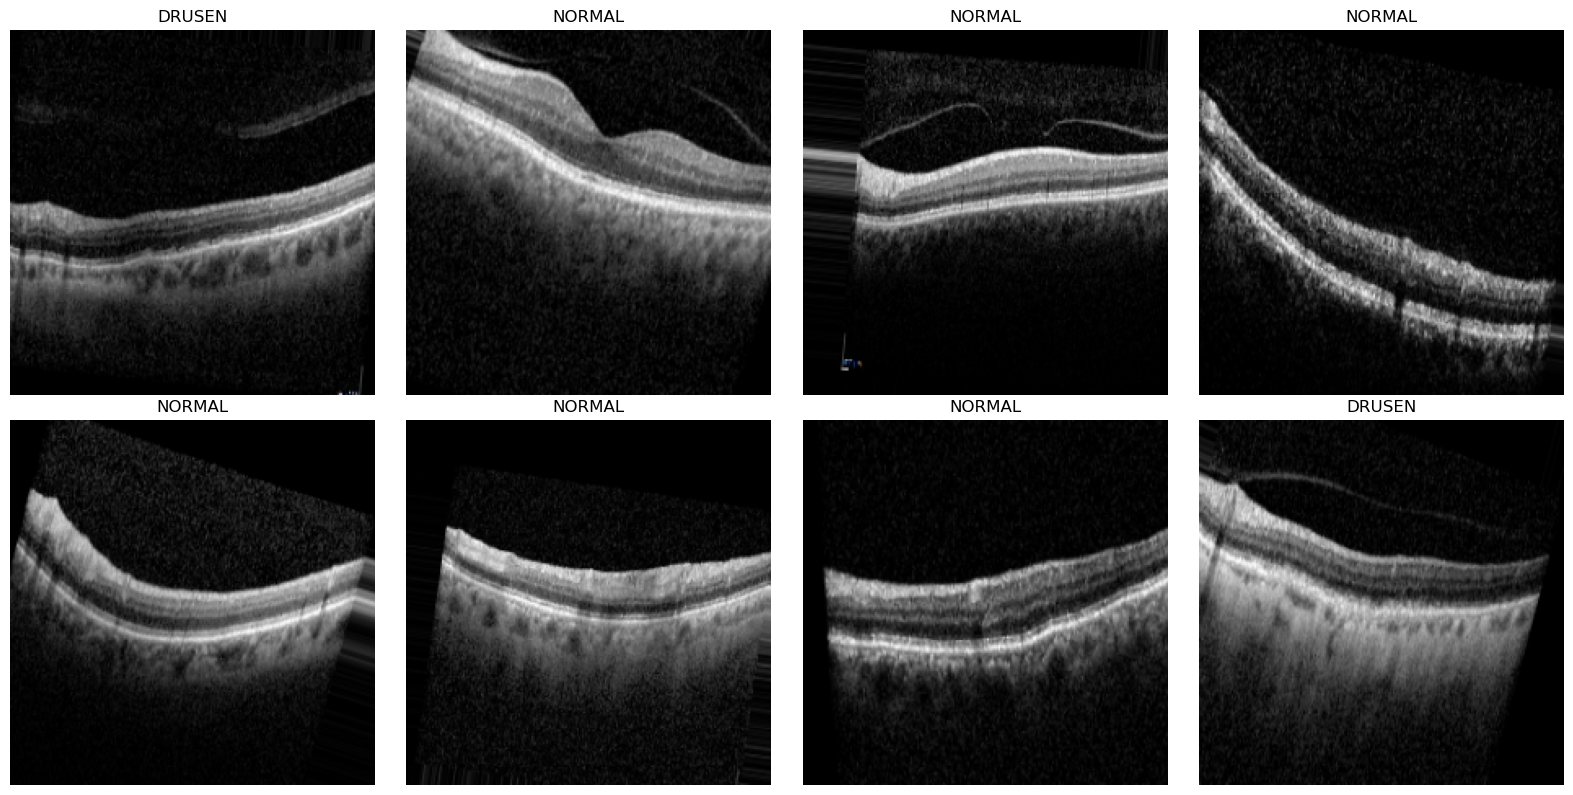

In [20]:
train_images, train_labels = next(train_data)
view_images(train_images, train_labels)

# Viewing validation images

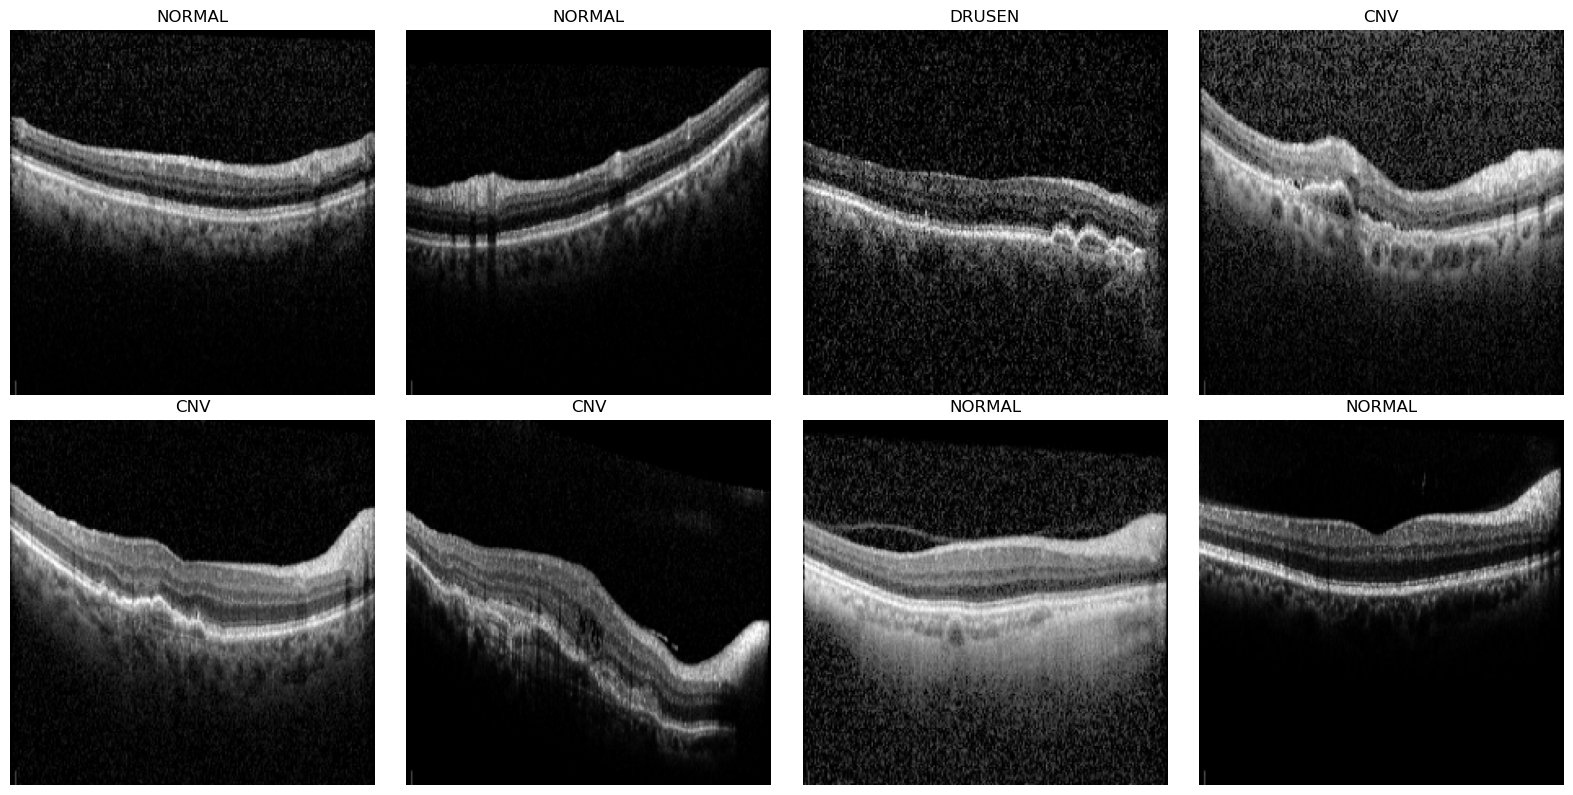

In [21]:
val_images, val_labels = next(val_data)
view_images(val_images, val_labels)

# Viewing test images


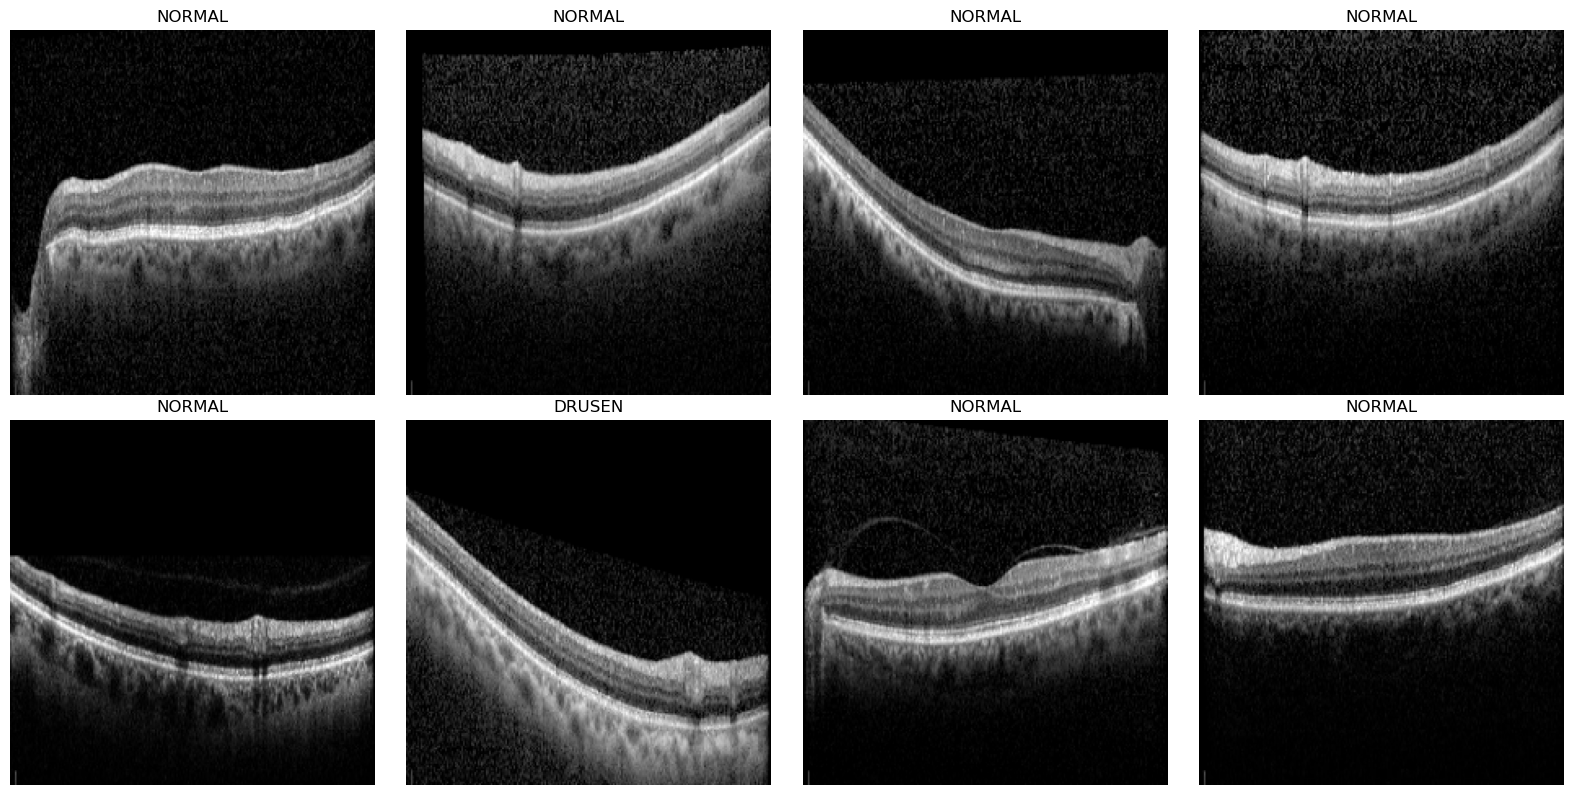

In [22]:
test_images, test_labels = next(test_data)
view_images(test_images,test_labels)

# Training With some models

In [23]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, mode='max')
lr_reduce = ReduceLROnPlateau(monitor = 'val_accuracy', patience=1, factor=0.5, min_lr=1e-6)

In [24]:
def plot_learnig_curves(history,title='History'):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label = 'Training Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy',linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(linestyle='--',alpha=0.2)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.plot(history.history['val_loss'], label = 'Validation',linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(linestyle='--',alpha=0.2)
    plt.legend()
    

    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Densnet201 with consant learning rate at 1e-6

In [25]:
from tensorflow.keras.applications import DenseNet201
dens_base2 = DenseNet201(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

for layer in dens_base2.layers:
    layer.trainable = False
dens_base2.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [26]:
dens_model2 = Sequential([
    Input(shape = (224,224,3)),
    dens_base2,
    #Conv2D(512,(1,1), activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    #Dropout(0.4),
    Dense(3, activation='softmax')
])
dens_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1920)       7680      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 18,822,211
Trainable params: 496,387
Non-t

In [27]:
dens_model2.compile(loss=tf.keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.99),
                    metrics=['accuracy']
                   )

In [28]:
dens_histor2 = dens_model2.fit(train_data, epochs=100, validation_data=val_data, callbacks=[early_stopping,lr_reduce], verbose=2)
#dens_model2.save('../models/NEH_UT-densnet201_tuned_constant_lr_100_epochs.h5')

Epoch 1/100
455/455 - 328s - loss: 0.5944 - accuracy: 0.7511 - val_loss: 0.5297 - val_accuracy: 0.7838 - lr: 0.0010 - 328s/epoch - 722ms/step
Epoch 2/100
455/455 - 309s - loss: 0.5047 - accuracy: 0.7937 - val_loss: 0.4581 - val_accuracy: 0.8093 - lr: 0.0010 - 309s/epoch - 680ms/step
Epoch 3/100
455/455 - 306s - loss: 0.4766 - accuracy: 0.8025 - val_loss: 0.5177 - val_accuracy: 0.7901 - lr: 0.0010 - 306s/epoch - 673ms/step
Epoch 4/100
455/455 - 307s - loss: 0.4413 - accuracy: 0.8173 - val_loss: 0.4443 - val_accuracy: 0.8148 - lr: 5.0000e-04 - 307s/epoch - 675ms/step
Epoch 5/100
455/455 - 312s - loss: 0.4188 - accuracy: 0.8290 - val_loss: 0.4766 - val_accuracy: 0.8038 - lr: 5.0000e-04 - 312s/epoch - 686ms/step
Epoch 6/100
455/455 - 311s - loss: 0.4119 - accuracy: 0.8317 - val_loss: 0.4256 - val_accuracy: 0.8157 - lr: 2.5000e-04 - 311s/epoch - 685ms/step
Epoch 7/100
455/455 - 314s - loss: 0.3947 - accuracy: 0.8395 - val_loss: 0.4359 - val_accuracy: 0.8157 - lr: 2.5000e-04 - 314s/epoch - 6

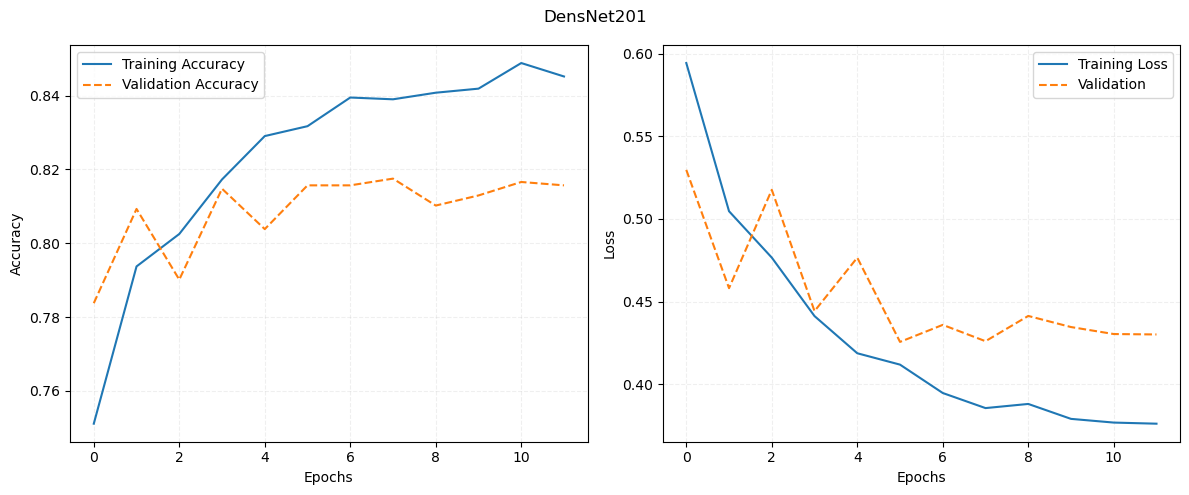

<Figure size 640x480 with 0 Axes>

In [29]:
plot_learnig_curves(dens_histor2,'DensNet201')
savefig('dens201_all_layers_constant_lr_100_epochs')

In [54]:
dens_model2.evaluate(test_data)

148/148 [==============================] - 12s 79ms/step - loss: 0.2459 - accuracy: 0.9092


[0.2459089159965515, 0.9091680645942688]

# ConvNext base

In [30]:
from tensorflow.keras.applications import ConvNeXtBase
conv_base = ConvNeXtBase(weights='imagenet', include_top = False, input_shape = (224,224,3))
for layer in conv_base.layers:
    layer.trainable = False
conv_base.summary()

Model: "convnext_base"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_base_prestem_normaliz  (None, 224, 224, 3)  0          ['input_3[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_base_stem (Sequential  (None, 56, 56, 128)  6528       ['convnext_base_prestem_normaliza
 )                                                               tion[0][0]']         

In [31]:
conv_model = Sequential([
    Input(shape = (224,224,3)),
    conv_base,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_base (Functional)  (None, 7, 7, 1024)        87566464  
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 1024)       4096      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 87,833,731
Trainable params: 265,219
Non

In [32]:
conv_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6, beta_1=0.99),
                    metrics=['accuracy']
                   )

In [ ]:
conv_history = conv_model.fit(train_data, epochs=50, validation_data=val_data, callbacks=[early_stopping], verbose=2)
#conv_model.save('../models/NEH_UT-ConvNextBase_tuned_constant_lr.h5')

Epoch 1/50
455/455 - 2966s - loss: 1.0716 - accuracy: 0.4264 - val_loss: 1.0475 - val_accuracy: 0.4745 - 2966s/epoch - 7s/step
Epoch 2/50
455/455 - 2940s - loss: 1.0355 - accuracy: 0.5093 - val_loss: 1.0056 - val_accuracy: 0.5411 - 2940s/epoch - 6s/step
Epoch 3/50
455/455 - 2942s - loss: 1.0032 - accuracy: 0.5651 - val_loss: 0.9669 - val_accuracy: 0.5867 - 2942s/epoch - 6s/step
Epoch 4/50
455/455 - 2939s - loss: 0.9736 - accuracy: 0.5998 - val_loss: 0.9376 - val_accuracy: 0.6104 - 2939s/epoch - 6s/step
Epoch 5/50
455/455 - 2938s - loss: 0.9501 - accuracy: 0.6167 - val_loss: 0.9108 - val_accuracy: 0.6378 - 2938s/epoch - 6s/step
Epoch 6/50
455/455 - 2938s - loss: 0.9301 - accuracy: 0.6224 - val_loss: 0.8866 - val_accuracy: 0.6505 - 2938s/epoch - 6s/step
Epoch 7/50
455/455 - 2938s - loss: 0.9098 - accuracy: 0.6331 - val_loss: 0.8657 - val_accuracy: 0.6569 - 2938s/epoch - 6s/step
Epoch 8/50
455/455 - 2937s - loss: 0.8932 - accuracy: 0.6416 - val_loss: 0.8474 - val_accuracy: 0.6642 - 2937s/

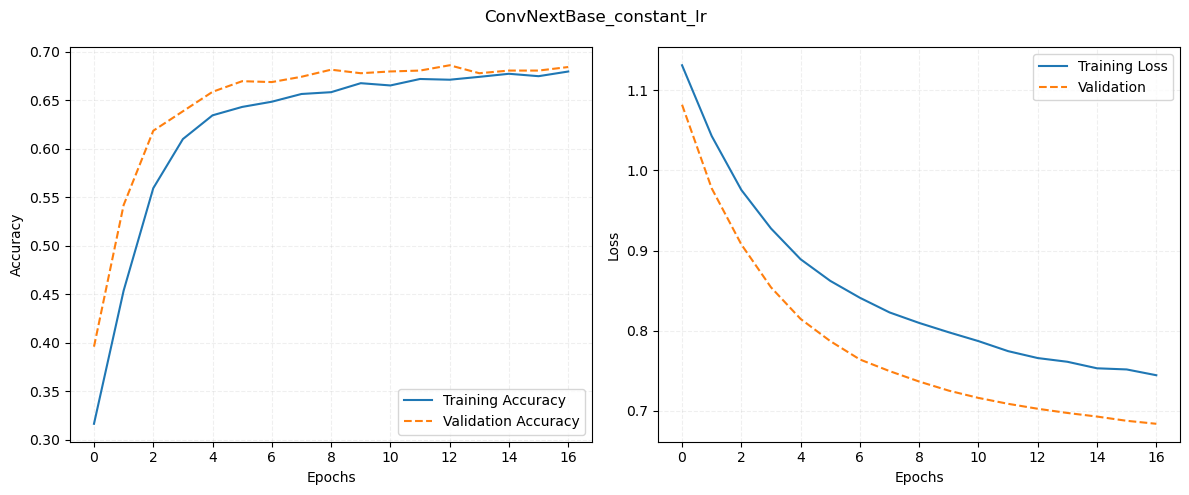

In [31]:
plot_learnig_curves(conv_history,'ConvNextBase_constant_lr')

In [32]:
conv_model.evaluate(test_data)

148/148 [==============================] - 30s 199ms/step - loss: 0.7101 - accuracy: 0.7020


[0.7100768685340881, 0.7020373344421387]

# Try other model

In [33]:
from tensorflow.keras.applications import InceptionV3
inception_base = InceptionV3(weights = 'imagenet', include_top=False, input_shape=(224,224,3))
for layer in inception_base.layers[:-22]:
    layer.trainable = False
inception_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 rmalization)                   )                                                      

In [34]:
inception_model = Sequential([
    Input(shape = (224,224,3)),
    
    inception_base,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(3, activation='softmax')
])
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 batch_normalization_96 (Bat  (None, 5, 5, 2048)       8192      
 chNormalization)                                                
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 22,861,603
Trainable params: 3,874,819
N

In [35]:
inception_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6, beta_1=0.99),
                        metrics=['accuracy']
                       )

In [36]:
inception_history = inception_model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[early_stopping], verbose=2)
#inception_model.save('../models/NEH_UT-InceptionV3_tuned.h5')

Epoch 1/100
1819/1819 - 327s - loss: 1.0487 - accuracy: 0.5155 - val_loss: 0.8323 - val_accuracy: 0.6825 - 327s/epoch - 180ms/step
Epoch 2/100
1819/1819 - 329s - loss: 0.8593 - accuracy: 0.6563 - val_loss: 0.7447 - val_accuracy: 0.7144 - 329s/epoch - 181ms/step
Epoch 3/100
1819/1819 - 313s - loss: 0.8022 - accuracy: 0.6910 - val_loss: 0.7081 - val_accuracy: 0.7290 - 313s/epoch - 172ms/step
Epoch 4/100
1819/1819 - 317s - loss: 0.7685 - accuracy: 0.7045 - val_loss: 0.6879 - val_accuracy: 0.7318 - 317s/epoch - 174ms/step
Epoch 5/100
1819/1819 - 317s - loss: 0.7500 - accuracy: 0.7125 - val_loss: 0.6693 - val_accuracy: 0.7546 - 317s/epoch - 174ms/step
Epoch 6/100
1819/1819 - 311s - loss: 0.7259 - accuracy: 0.7286 - val_loss: 0.6575 - val_accuracy: 0.7628 - 311s/epoch - 171ms/step
Epoch 7/100
1819/1819 - 315s - loss: 0.7173 - accuracy: 0.7347 - val_loss: 0.6467 - val_accuracy: 0.7655 - 315s/epoch - 173ms/step
Epoch 8/100
1819/1819 - 314s - loss: 0.7096 - accuracy: 0.7338 - val_loss: 0.6364 -

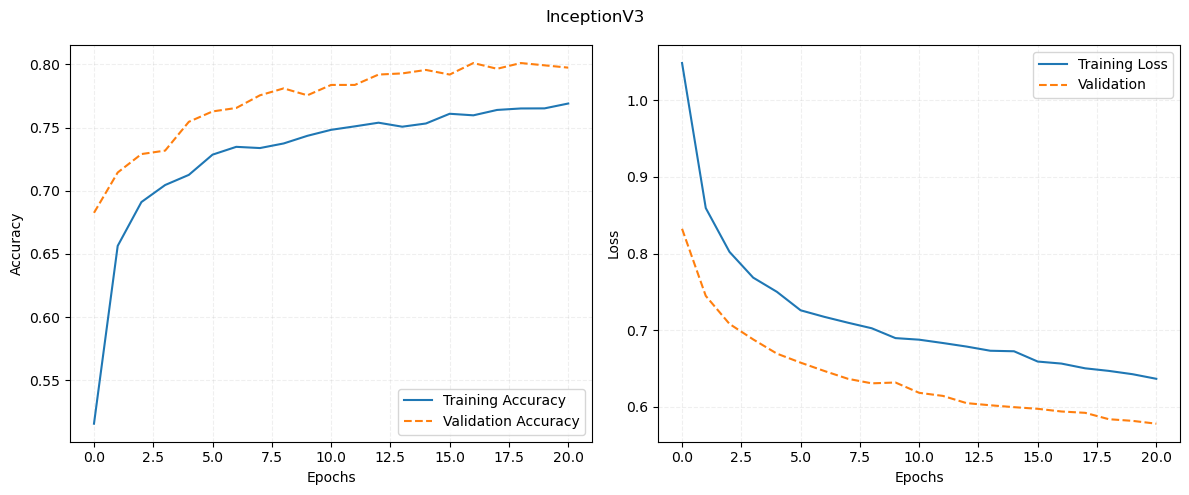

In [37]:
plot_learnig_curves(inception_history,'InceptionV3')

In [38]:
inception_model.evaluate(test_data)

148/148 [==============================] - 12s 78ms/step - loss: 0.5915 - accuracy: 0.7869


[0.5914947986602783, 0.7869269847869873]

In [40]:
from tensorflow.keras.models import load_model
dens_loaded = load_model('../models/NEH_UT-densnet201_tuned_constant_lr.h5')

In [41]:
dens_loaded.evaluate(test_data)

148/148 [==============================] - 19s 94ms/step - loss: 0.2552 - accuracy: 0.9075


[0.25523707270622253, 0.9074702858924866]

# Xception

In [19]:
from tensorflow.keras.applications import Xception
xception_net = Xception(weights='imagenet',include_top = False,input_shape=(224,224,3))
for layer in xception_net.layers:
    layer.trainable = False
xception_net.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [20]:
xception_model = Sequential([
    Input(shape=(224,224,3)),
    xception_net,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(3,activation='softmax')
])
xception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 21,920,299
Trainable params: 1,054,723
Non

In [21]:
xception_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.95),
                       metrics=['accuracy']
                      )

In [22]:
xception_history = xception_model.fit(train_data, epochs=100,validation_data=val_data, callbacks=[early_stopping,lr_reduce],verbose=2)

Epoch 1/100
1819/1819 - 325s - loss: 0.8569 - accuracy: 0.6699 - val_loss: 0.6838 - val_accuracy: 0.7619 - lr: 1.0000e-04 - 325s/epoch - 179ms/step
Epoch 2/100
1819/1819 - 323s - loss: 0.7762 - accuracy: 0.7120 - val_loss: 0.6877 - val_accuracy: 0.7628 - lr: 1.0000e-04 - 323s/epoch - 178ms/step
Epoch 3/100
1819/1819 - 311s - loss: 0.7314 - accuracy: 0.7225 - val_loss: 0.6391 - val_accuracy: 0.7810 - lr: 1.0000e-04 - 311s/epoch - 171ms/step
Epoch 4/100
1819/1819 - 348s - loss: 0.7067 - accuracy: 0.7349 - val_loss: 0.6337 - val_accuracy: 0.7883 - lr: 1.0000e-04 - 348s/epoch - 191ms/step
Epoch 5/100
1819/1819 - 339s - loss: 0.6984 - accuracy: 0.7312 - val_loss: 0.6231 - val_accuracy: 0.7728 - lr: 1.0000e-04 - 339s/epoch - 186ms/step
Epoch 6/100
1819/1819 - 325s - loss: 0.6610 - accuracy: 0.7502 - val_loss: 0.5944 - val_accuracy: 0.7892 - lr: 5.0000e-05 - 325s/epoch - 179ms/step
Epoch 7/100
1819/1819 - 330s - loss: 0.6435 - accuracy: 0.7590 - val_loss: 0.5866 - val_accuracy: 0.8011 - lr: 5

In [ ]:
xception_model.save('../models/NEH_UT-xception.h5')

In [ ]:
plot_learnig_curves(xception_history,'Xception')
plt.savefig('../figures/NEH_UT_octd/xception.png')